In [48]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from Data.LatentDataset import LatentFMRIDataset
import matplotlib.pyplot as plt

In [49]:
data_directory = '/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_UM1_merged'
test_ratio = 0.15

In [50]:
dataset = LatentFMRIDataset(data_dir=data_directory)
all_data_items = dataset.get_all_items()
X = all_data_items['X']
y = all_data_items['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio)

In [51]:
dataset.labels_df['DX_GROUP'].value_counts()

DX_GROUP
2    30545
1    22630
Name: count, dtype: int64

In [52]:
X_train[20, 3].shape

(16, 18)

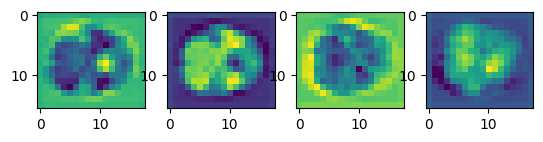

In [53]:
f, axarr = plt.subplots(1,4) 
axarr[0].imshow(X_train[20, 0])
axarr[1].imshow(X_train[20, 1])
axarr[2].imshow(X_train[20, 2])
axarr[3].imshow(X_train[20, 3])

In [38]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [54]:
X_train.shape

(45198, 4, 16, 18)

In [55]:
X_train.std(), X_train.mean()

(0.34024847325095925, -0.07686414304630271)

In [56]:
X_train_one = X_train[y_train == 1]
X_train_one.shape

(19284, 4, 16, 18)

In [57]:
X_train_two = X_train[y_train == 2]
X_train_two.shape

(25914, 4, 16, 18)

In [58]:
import pylab as pyl

In [64]:
nyu_1 = np.load(file='/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_all/NYU_0050974-70.npy')
nyu_2 = np.load(file='/Users/balazsmorvay/PycharmProjects/VAE/Assets/NYU_all/NYU_0051055-70.npy')

um1_1 = np.load(file='/Users/balazsmorvay/PycharmProjects/VAE/Assets/UM_1_all/UM_1_0050272-70.npy')
um1_2 = np.load(file='/Users/balazsmorvay/PycharmProjects/VAE/Assets/UM_1_all/UM_1_0050335-70.npy')

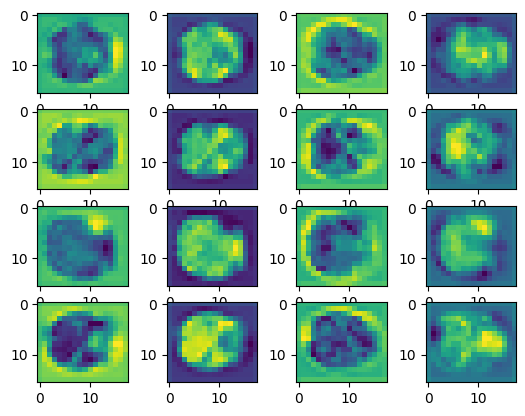

In [66]:
f, axarr = plt.subplots(4,4) 

axarr[0, 0].imshow(nyu_1[0])
axarr[0, 1].imshow(nyu_1[1])
axarr[0, 2].imshow(nyu_1[2])
axarr[0, 3].imshow(nyu_1[3])

axarr[1, 0].imshow(nyu_2[0])
axarr[1, 1].imshow(nyu_2[1])
axarr[1, 2].imshow(nyu_2[2])
axarr[1, 3].imshow(nyu_2[3])

axarr[2, 0].imshow(um1_1[0])
axarr[2, 1].imshow(um1_1[1])
axarr[2, 2].imshow(um1_1[2])
axarr[2, 3].imshow(um1_1[3])

axarr[3, 0].imshow(um1_2[0])
axarr[3, 1].imshow(um1_2[1])
axarr[3, 2].imshow(um1_2[2])
axarr[3, 3].imshow(um1_2[3])

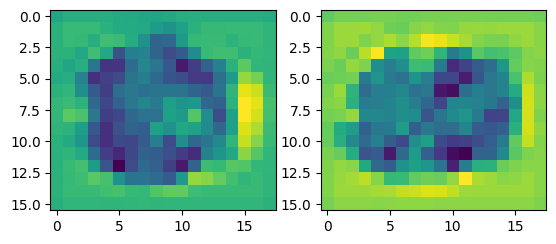

In [88]:
f, axarr = plt.subplots(1,2) 
axarr[0].imshow(nyu_1[0])
axarr[1].imshow(nyu_2[0])

In [91]:
nyu_2[0].shape

(16, 18)

In [92]:
F_1 = pyl.fft2(nyu_1[0]) / np.sqrt(16*18)
F_2 = pyl.fft2(nyu_2[0]) / np.sqrt(16*18)

In [93]:
from pylab import linalg

print("Energy of Image:   %f" %linalg.norm(nyu_1[0]))
print("Energy of Fourier 1: %f" %linalg.norm(F_1))
print("Energy of Fourier 2: %f" %linalg.norm(F_2))

Energy of Image:   4.820413
Energy of Fourier 1: 4.820413
Energy of Fourier 2: 5.094592


In [94]:
F_1.shape, F_2.shape

((16, 18), (16, 18))

In [95]:
L1 = pyl.fftshift(np.log(abs(F_1) + 1e-1))
L2 = pyl.fftshift(np.log(abs(F_2) + 1e-1))

<Figure size 500x500 with 0 Axes>

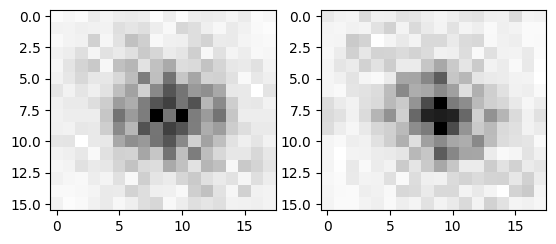

In [96]:
plt.figure(figsize = (5,5))
f, axarr = plt.subplots(1,2)
plt.title = 'Log(Fourier transform)'
axarr[0].imshow(L1, cmap='Grays')
axarr[1].imshow(L2, cmap='Grays')

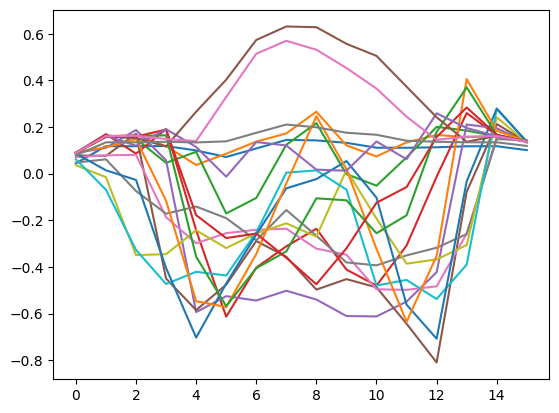

In [85]:
plt.plot(nyu_1[0])

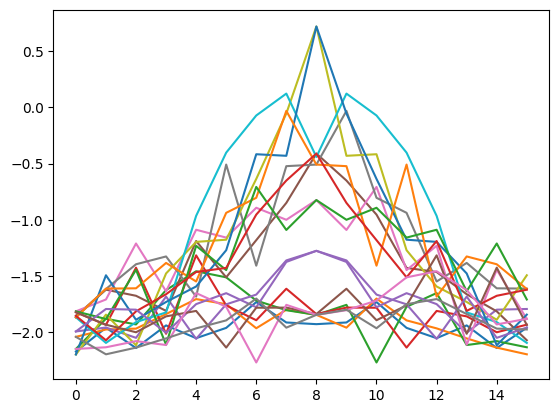

In [86]:
plt.plot(L1)

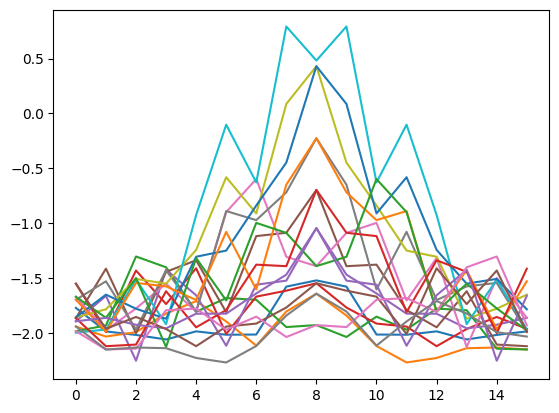

In [97]:
plt.plot(L2)